In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt


import custom_loss


/Users/gam/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/gam/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/gam/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/gam/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
def build_model():
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )
    return model



In [4]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [5]:
batch_size = 128
epochs = 5

model1 = build_model()
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history1 = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 36s 674us/sample - loss: 0.3725 - acc: 0.8878 - val_loss: 0.0831 - val_acc: 0.9792
Epoch 2/5
54000/54000 [==============================] - 32s 599us/sample - loss: 0.1141 - acc: 0.9649 - val_loss: 0.0589 - val_acc: 0.9833
Epoch 3/5
54000/54000 [==============================] - 32s 594us/sample - loss: 0.0840 - acc: 0.9741 - val_loss: 0.0508 - val_acc: 0.9858
Epoch 4/5
54000/54000 [==============================] - 32s 589us/sample - loss: 0.0703 - acc: 0.9779 - val_loss: 0.0416 - val_acc: 0.9870
Epoch 5/5
54000/54000 [==============================] - 31s 582us/sample - loss: 0.0611 - acc: 0.9814 - val_loss: 0.0406 - val_acc: 0.9878


In [6]:
score = model1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03943029860421084
Test accuracy: 0.9877


In [7]:
model2 = build_model()
model2.compile(loss=custom_loss.ce_custom_loss, optimizer="adam", metrics=["accuracy"])
history2 = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 34s 632us/sample - loss: 0.3699 - acc: 0.8888 - val_loss: 0.0817 - val_acc: 0.9793
Epoch 2/5
54000/54000 [==============================] - 34s 632us/sample - loss: 0.1103 - acc: 0.9671 - val_loss: 0.0539 - val_acc: 0.9848
Epoch 3/5
54000/54000 [==============================] - 37s 693us/sample - loss: 0.0824 - acc: 0.9746 - val_loss: 0.0462 - val_acc: 0.9873
Epoch 4/5
54000/54000 [==============================] - 37s 686us/sample - loss: 0.0711 - acc: 0.9782 - val_loss: 0.0442 - val_acc: 0.9875
Epoch 5/5
54000/54000 [==============================] - 36s 668us/sample - loss: 0.0613 - acc: 0.9812 - val_loss: 0.0378 - val_acc: 0.9903
Test loss: 0.03606547953691334
Test accuracy: 0.9887


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


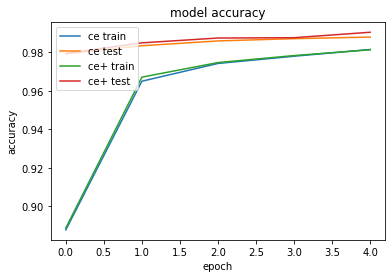

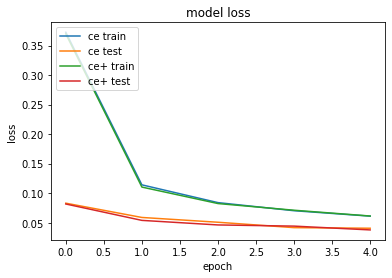

In [8]:
custom_loss.compare_models(history1, history2)

In [9]:
cross entropy 15 epochs
Test loss: 0.026275044947856804
Test accuracy: 0.991

cross entropy 8 epocs
Test loss: 0.03290628776843078
Test accuracy: 0.9888
    
new 8 epochs
Test loss: -0.9681606561660766
Test accuracy: 0.9891

new 15 epochs
Test loss: -0.976218420791626
Test accuracy: 0.9924
    
new 15 epochs
Test loss: -0.09756205699443816
Test accuracy: 0.9918
    

new2 15 epochs
Test loss: 0.024195944295398657
Test accuracy: 0.992

SyntaxError: invalid syntax (<ipython-input-9-bf5b39a1e36c>, line 1)

In [ ]:
Train on 54000 samples, validate on 6000 samples
Epoch 1/8
54000/54000 [==============================] - 39s 728us/sample - loss: 0.3701 - acc: 0.8887 - val_loss: 0.0769 - val_acc: 0.9800
Epoch 2/8
54000/54000 [==============================] - 42s 770us/sample - loss: 0.1108 - acc: 0.9664 - val_loss: 0.0556 - val_acc: 0.9848
Epoch 3/8
54000/54000 [==============================] - 41s 753us/sample - loss: 0.0829 - acc: 0.9743 - val_loss: 0.0472 - val_acc: 0.9877
Epoch 4/8
54000/54000 [==============================] - 44s 816us/sample - loss: 0.0701 - acc: 0.9780 - val_loss: 0.0420 - val_acc: 0.9890
Epoch 5/8
54000/54000 [==============================] - 34s 638us/sample - loss: 0.0611 - acc: 0.9812 - val_loss: 0.0407 - val_acc: 0.9900
Epoch 6/8
54000/54000 [==============================] - 38s 708us/sample - loss: 0.0544 - acc: 0.9831 - val_loss: 0.0404 - val_acc: 0.9885
Epoch 7/8
54000/54000 [==============================] - 31s 565us/sample - loss: 0.0518 - acc: 0.9837 - val_loss: 0.0377 - val_acc: 0.9895
Epoch 8/8
54000/54000 [==============================] - 34s 636us/sample - loss: 0.0472 - acc: 0.9849 - val_loss: 0.0362 - val_acc: 0.9910
Out[5]:
<tensorflow.python.keras.callbacks.History at 0x7fdcd4a54b50>